In [3]:
import requests as re
import pandas as pd 
pd.set_option('display.max_columns', 30)
import sklearn as sk
import json as json
import urllib2
from urllib import urlopen

import gzip
import ujson
import wget

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

from numpy import random
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

from IPython import display
from sklearn.externals.six import StringIO
import pydot
import numpy as np
from matplotlib import pylab as plt
from sklearn import tree
from sklearn import datasets, linear_model, utils, preprocessing

import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#url = 'http://thedataincubator.s3.amazonaws.com/coursedata/mldata/yelp_train_academic_dataset_business.json.gz'
#filename = wget.download(url)

#print filename
data = []
with gzip.open('yelp_train_academic_dataset_business.json.gz', 'rb') as f:
    data.extend([ujson.loads(line) for line in f.readlines()])
    #file_content = f.read()

#data = json.loads(file_content)
    
#import gzip
#with gzip.open('yelp_train_academic_dataset_business.json.gz') as f:
#    file_content = f.read()

In [5]:
df = pd.DataFrame(data)

In [97]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
class meanEstimator(BaseEstimator, RegressorMixin):
    """ Mean estimator that takes a dataframe, Categorical variable and a metric
        and returns the mean of the metric grouped by the levels of the categorical 
        variable
    """
    def __init__(self, df, catVar, metricVar):
        self.df = df
        self.catVar = catVar
        self.metricVar = metricVar
        pass
    
    """This is used when you print the instance"""
    def __str__(self):
        return "Dataframe Categorical Var and Metric : %s, %s" % ( self.catVar, self.metricVar)
    def fit(self, X=None, y=None): 
        self.idx = df.groupby(self.catVar)[self.metricVar].mean().to_dict()
        return self
       
    def predict(self, X):
        try:
            #y = self.idx[X]
            y = [ self.df[X]]
        except KeyError:
            y = 0
        return y
    
    
###

from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
class meanEstimator2(BaseEstimator, RegressorMixin):
    """ Mean estimator that takes a dataframe, Categorical variable and a metric
        and returns the mean of the metric grouped by the levels of the categorical 
        variable
    """
    def __init__(self, df, catVar, metricVar):
        self.df = df
        self.catVar = catVar
        self.metricVar = metricVar
        pass
    
    """This is used when you print the instance"""
    def __str__(self):
        return "Dataframe Categorical Var and Metric : %s, %s" % ( self.catVar, self.metricVar)
    def fit(self, X=None, y=None): 
        self.idx = df.groupby('city')['stars'].mean().to_dict()
        return self
       
    def predict(self, X=None):
        try:
            y = self.idx[X]
        except KeyError:
            y = 0
        return y

In [100]:
import pickle

#clf = meanEstimator2(df, 'city', 'stars')
s = pickle.dumps(test)
clf2 = pickle.loads(s)

#array([0])
#>>> y[0]

In [101]:
clf2.predict('De Forest')

3.75

In [98]:
test = meanEstimator2(df, 'city', 'stars')

In [99]:
test.fit()
test.predict('De Forest')

3.75

In [62]:
y = df['stars']
X = df['city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [468]:
#test.fit()
test.predict('De Forest')

3.75

In [15]:
import dill

In [102]:
dill_out = open("city.dill","wb")
dill.dump(test,dill_out)
dill_out.close()

In [26]:
pickle_in = open("city_dill","rb")
xxx = dill.load(pickle_in)

In [104]:
test_json = [
    {"business_id": "vcNAWiLM4dR7D2nwwJ7nCA", "full_address": "4840 E Indian School Rd\nSte 101\nPhoenix, AZ 85018", "hours": {"Tuesday": {"close": "17:00", "open": "08:00"}, "Friday": {"close": "17:00", "open": "08:00"}, "Monday": {"close": "17:00", "open": "08:00"}, "Wednesday": {"close": "17:00", "open": "08:00"}, "Thursday": {"close": "17:00", "open": "08:00"}}, "open": True, "categories": ["Doctors", "Health & Medical"], "city": "Phoenix", "review_count": 7, "name": "Eric Goldberg, MD", "neighborhoods": [], "longitude": -111.98375799999999, "state": "AZ", "stars": 3.5, "latitude": 33.499313000000001, "attributes": {"By Appointment Only": True}, "type": "business"},
    {"business_id": "JwUE5GmEO-sH1FuwJgKBlQ", "full_address": "6162 US Highway 51\nDe Forest, WI 53532", "hours": {}, "open": True, "categories": ["Restaurants"], "city": "De Forest", "review_count": 26, "name": "Pine Cone Restaurant", "neighborhoods": [], "longitude": -89.335843999999994, "state": "WI", "stars": 4.0, "latitude": 43.238892999999997, "attributes": {"Take-out": True, "Good For": {"dessert": False, "latenight": False, "lunch": True, "dinner": False, "breakfast": False, "brunch": False}, "Caters": False, "Noise Level": "average", "Takes Reservations": False, "Delivery": False, "Ambience": {"romantic": False, "intimate": False, "touristy": False, "hipster": False, "divey": False, "classy": False, "trendy": False, "upscale": False, "casual": False}, "Parking": {"garage": False, "street": False, "validated": False, "lot": True, "valet": False}, "Has TV": True, "Outdoor Seating": False, "Attire": "casual", "Alcohol": "none", "Waiter Service": True, "Accepts Credit Cards": True, "Good for Kids": True, "Good For Groups": True, "Price Range": 1}, "type": "business"},
    {"business_id": "uGykseHzyS5xAMWoN6YUqA", "full_address": "505 W North St\nDe Forest, WI 53532", "hours": {"Monday": {"close": "22:00", "open": "06:00"}, "Tuesday": {"close": "22:00", "open": "06:00"}, "Friday": {"close": "22:00", "open": "06:00"}, "Wednesday": {"close": "22:00", "open": "06:00"}, "Thursday": {"close": "22:00", "open": "06:00"}, "Sunday": {"close": "21:00", "open": "06:00"}, "Saturday": {"close": "22:00", "open": "06:00"}}, "open": True, "categories": ["American (Traditional)", "Restaurants"], "city": "De Forest", "review_count": 16, "name": "Deforest Family Restaurant", "neighborhoods": [], "longitude": -89.353437, "state": "WI", "stars": 4.0, "latitude": 43.252267000000003, "attributes": {"Take-out": True, "Good For": {"dessert": False, "latenight": False, "lunch": False, "dinner": False, "breakfast": False, "brunch": True}, "Caters": False, "Noise Level": "quiet", "Takes Reservations": False, "Delivery": False, "Parking": {"garage": False, "street": False, "validated": False, "lot": True, "valet": False}, "Has TV": True, "Outdoor Seating": False, "Attire": "casual", "Ambience": {"romantic": False, "intimate": False, "touristy": False, "hipster": False, "divey": False, "classy": False, "trendy": False, "upscale": False, "casual": True}, "Waiter Service": True, "Accepts Credit Cards": True, "Good for Kids": True, "Good For Groups": True, "Price Range": 1}, "type": "business"},
    {"business_id": "LRKJF43s9-3jG9Lgx4zODg", "full_address": "4910 County Rd V\nDe Forest, WI 53532", "hours": {"Monday": {"close": "22:00", "open": "10:30"}, "Tuesday": {"close": "22:00", "open": "10:30"}, "Friday": {"close": "22:00", "open": "10:30"}, "Wednesday": {"close": "22:00", "open": "10:30"}, "Thursday": {"close": "22:00", "open": "10:30"}, "Sunday": {"close": "22:00", "open": "10:30"}, "Saturday": {"close": "22:00", "open": "10:30"}}, "open": True, "categories": ["Food", "Ice Cream & Frozen Yogurt", "Fast Food", "Restaurants"], "city": "De Forest", "review_count": 7, "name": "Culver's", "neighborhoods": [], "longitude": -89.374983, "state": "WI", "stars": 4.5, "latitude": 43.251044999999998, "attributes": {"Take-out": True, "Wi-Fi": "free", "Takes Reservations": False, "Delivery": False, "Parking": {"garage": False, "street": False, "validated": False, "lot": True, "valet": False}, "Wheelchair Accessible": True, "Attire": "casual", "Accepts Credit Cards": True, "Good For Groups": True, "Price Range": 1}, "type": "business"},
    {"business_id": "RgDg-k9S5YD_BaxMckifkg", "full_address": "631 S Main St\nDe Forest, WI 53532", "hours": {"Monday": {"close": "22:00", "open": "11:00"}, "Tuesday": {"close": "22:00", "open": "11:00"}, "Friday": {"close": "22:30", "open": "11:00"}, "Wednesday": {"close": "22:00", "open": "11:00"}, "Thursday": {"close": "22:00", "open": "11:00"}, "Sunday": {"close": "21:00", "open": "16:00"}, "Saturday": {"close": "22:30", "open": "11:00"}}, "open": True, "categories": ["Chinese", "Restaurants"], "city": "De Forest", "review_count": 3, "name": "Chang Jiang Chinese Kitchen", "neighborhoods": [], "longitude": -89.343721700000003, "state": "WI", "stars": 4.0, "latitude": 43.2408748, "attributes": {"Take-out": True, "Has TV": False, "Outdoor Seating": False, "Attire": "casual"}, "type": "business"}
]

In [166]:
testx = []
for i in test_json:
    testx.append([i['longitude'], i['latitude']])

In [194]:
test_json[1]['longitude']
X = [test_json[1]['longitude'],test_json[1]['latitude']]
print X
knn2.predict(X).item()

[-89.335844, 43.238893]


3.5

In [32]:
yyy = xxx(df, 'city', 'stars')

In [182]:
yyy.predict(df['city'][:2])

[3.6702903946388683, 3.75]

In [104]:
print X_test[:10]

10803     Las Vegas
26545     Las Vegas
20379    Cave Creek
17287      Waterloo
7672        Gilbert
29654     Edinburgh
7964        Phoenix
34815       Madison
37027     Las Vegas
29936     Las Vegas
Name: city, dtype: object


In [34]:
yyy.fit()

meanEstimator(catVar='city',
       df=                                              attributes  \
0                         {u'By Appointment Only': True}
1      {u'Take-out': True, u'Price Range': 1, u'Outdo...
2      {u'Take-out': True, u'Outdoor Seating': False,...
3      {u'Take-out': True, u'Accepts Credit Cards': T... ...
37934  business
37935  business
37936  business
37937  business

[37938 rows x 15 columns],
       metricVar='stars')

In [40]:
print type(X_test)

<class 'pandas.core.series.Series'>


In [42]:
test_json[1]['city']

'De Forest'

## lat_long_model
You can imagine that a city-based model might not be sufficiently fine-grained.
For example, we know that some neighborhoods are trendier than others.  We
might consider a K Nearest Neighbors or Random Forest based on the latitude
longitude as a way to understand neighborhood dynamics.

You should implement a generic `ColumnSelectTransformer` that is passed which
columns to select in the transformer and use a non-linear model like
`sklearn.neighbors.KNeighborsRegressor` or
`sklearn.ensemble.RandomForestRegressor` as the estimator (why would you choose
a non-linear model?).  Bonus points if you wrap the estimator in
`grid_search.GridSearchCV` and use cross-validation to determine the optimal
value of the parameters.

In [144]:
#print df.head()
from sklearn import neighbors, datasets
from sklearn import neighbors, cross_validation, grid_search
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize

y = df['stars']

X = df[['latitude','longitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn.fit(X_train,y_train)

knn.predict(X_test)

array([ 4. ,  2.5,  4. , ...,  2.5,  2. ,  4. ])

In [151]:
knn.predict(df[['latitude','longitude']]).mean()

3.2177368337814327

In [152]:
dill_out = open("knn.dill","wb")
dill.dump(knn,dill_out)
dill_out.close()

In [153]:
pickle_in = open("knn.dill","rb")
knn2 = dill.load(pickle_in)

In [186]:
knn2.predict(testx).tolist()

[3.5, 3.5, 3.5, 3.5, 3.5]

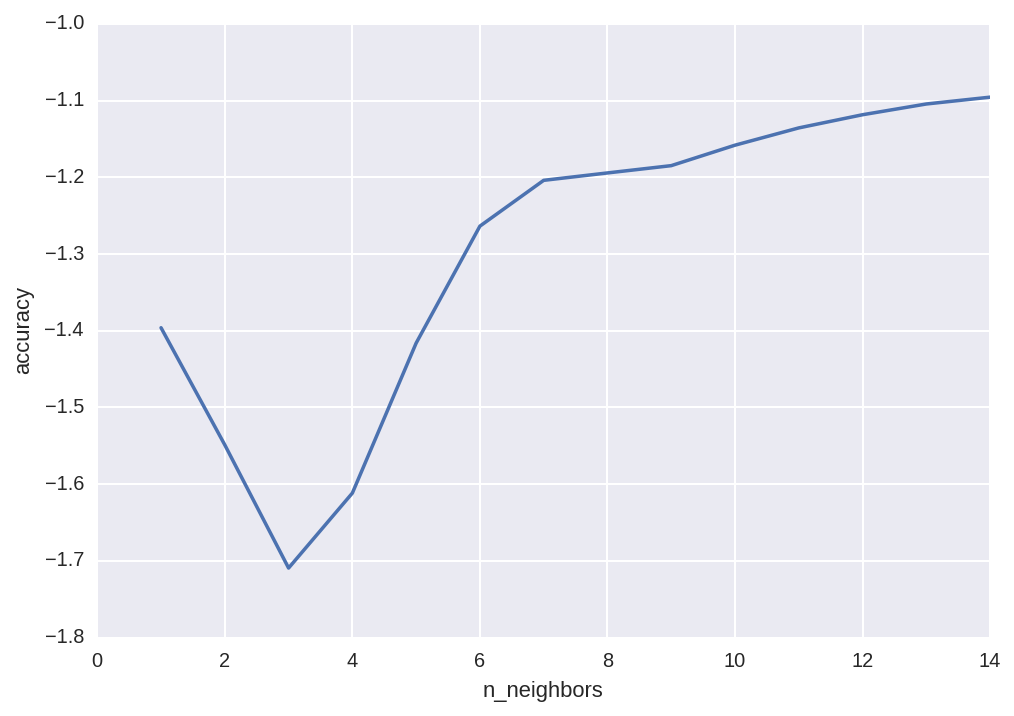

In [146]:
cv = cross_validation.ShuffleSplit(len(y), n_iter=20, test_size=0.2, random_state=42)
param_grid = { "n_neighbors": range(1, 15, 1) }
nearest_neighbors_cv = grid_search.GridSearchCV(neighbors.KNeighborsClassifier(), 
                                                param_grid=param_grid, cv=cv, 
                                                scoring='mean_squared_error')

nearest_neighbors_cv.fit(X,y)
cv_accuracy = pd.DataFrame.from_records(
    [(score.parameters['n_neighbors'],
      score.mean_validation_score)
     for score in nearest_neighbors_cv.grid_scores_],
columns=['n_neighbors', 'accuracy'])

plt.plot(cv_accuracy.n_neighbors, cv_accuracy.accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

In [122]:
print X.head()
print y.head()
print param_grid

    latitude   longitude
0  33.499313 -111.983758
1  43.238893  -89.335844
2  43.252267  -89.353437
3  43.251045  -89.374983
4  43.240875  -89.343722
0      Phoenix
1    De Forest
2    De Forest
3    De Forest
4    De Forest
Name: city, dtype: object
{'n_neighbors': [1, 5, 9, 13, 17, 21]}


In [116]:
print y.unique()

[ 3.5  4.   4.5  1.5  2.   2.5  5.   3.   1. ]


In [139]:
#print y
label_binarize([1,4,4.5,3], classes=[1,1.5,2,2.5,3,3.5,4,4.5,5])

UnboundLocalError: local variable 'Y' referenced before assignment

In [213]:
df[:5]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
1,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business
2,"{u'Take-out': True, u'Outdoor Seating': False,...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{u'Monday': {u'close': u'22:00', u'open': u'06...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business
3,"{u'Take-out': True, u'Accepts Credit Cards': T...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{u'Monday': {u'close': u'22:00', u'open': u'10...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business
4,"{u'Take-out': True, u'Has TV': False, u'Outdoo...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{u'Monday': {u'close': u'22:00', u'open': u'11...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business


In [245]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)

In [201]:
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)

In [216]:
category = df['categories']
print category[:10]
print X_test[:10]

0                          [Doctors, Health & Medical]
1                                        [Restaurants]
2                [American (Traditional), Restaurants]
3    [Food, Ice Cream & Frozen Yogurt, Fast Food, R...
4                               [Chinese, Restaurants]
5                    [Television Stations, Mass Media]
6     [Home Services, Heating & Air Conditioning/HVAC]
7            [Libraries, Public Services & Government]
8                                [Veterinarians, Pets]
9    [Bars, American (Traditional), Nightlife, Loun...
Name: categories, dtype: object
        latitude   longitude
10803  36.124423 -115.146372
26545  36.090234 -115.172458
20379  33.798347 -111.978638
17287  43.471891  -80.537082
7672   33.365096 -111.829287
29654  55.976753   -3.171883
7964   33.675264 -111.975618
34815  43.075741  -89.376977
37027  36.117280 -115.171764
29936  36.124423 -115.146372


In [217]:
X = v.fit_transform(category)
vec_x_cat_train = v.fit_transform(X_train)

AttributeError: 'list' object has no attribute 'iteritems'

In [24]:
cols_to_retain = [ 'categories' ]
cat_df = df[ cols_to_retain ]
cat_dict = cat_df.T.to_dict().values()

In [237]:
measurements = [
...     {'city': 'Dubai', 'temperature': 33.},
...     {'city': 'London', 'temperature': 12.},
...     {'city': 'San Fransisco', 'temperature': 18.},
... ]
vec = DictVectorizer()
print vec.fit_transform(measurements).toarray()
print vec.get_feature_names()

[[  1.   0.   0.  33.]
 [  0.   1.   0.  12.]
 [  0.   0.   1.  18.]]
['city=Dubai', 'city=London', 'city=San Fransisco', 'temperature']


In [236]:
measurements = [
...     {'city=Dubai': True, 'city=London': True, 'temperature': 33.},
...     {'city=London': True, 'city=San Fransisco': True, 'temperature': 12.},
...     {'city': 'San Fransisco', 'temperature': 18.},
... ]
vec.fit_transform(measurements).toarray()

array([[  1.,   1.,   0.,  33.],
       [  0.,   1.,   1.,  12.],
       [  0.,   0.,   1.,  18.]])

In [262]:
def flatten_category(d):
...     # in-place version
...     if isinstance(d.get('categories'), list):
...         for cat in d.pop('categories'):
...             d['categories=%s' % cat] = True
...     return d

In [25]:
print cat_dict[:10]
cat2 = map(flatten_category, cat_dict[:10])
print cat2

[{u'categories': [u'Doctors', u'Health & Medical']}, {u'categories': [u'Restaurants']}, {u'categories': [u'American (Traditional)', u'Restaurants']}, {u'categories': [u'Food', u'Ice Cream & Frozen Yogurt', u'Fast Food', u'Restaurants']}, {u'categories': [u'Chinese', u'Restaurants']}, {u'categories': [u'Television Stations', u'Mass Media']}, {u'categories': [u'Home Services', u'Heating & Air Conditioning/HVAC']}, {u'categories': [u'Libraries', u'Public Services & Government']}, {u'categories': [u'Veterinarians', u'Pets']}, {u'categories': [u'Bars', u'American (Traditional)', u'Nightlife', u'Lounges', u'Restaurants']}]
[{u'categories=Doctors': True, u'categories=Health & Medical': True}, {u'categories=Restaurants': True}, {u'categories=Restaurants': True, u'categories=American (Traditional)': True}, {u'categories=Fast Food': True, u'categories=Ice Cream & Frozen Yogurt': True, u'categories=Food': True, u'categories=Restaurants': True}, {u'categories=Chinese': True, u'categories=Restauran

In [26]:
cat2 = map(flatten_category, cat_dict[:10])
vec_list = vec.fit_transform(cat2).toarray()
print vec_list
print vec.get_feature_names()

[[ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
   0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   1.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.
   0.]]
[u'categories=American (Traditional)', u'categories=Bars', u'categories=Chinese', u'categories=Doctors', u'categories=Fast Food', u'categories=Food', u'categories=Health & Medical', u'categ

In [261]:
catt = ["%s=%s" % (k, v) for k, v in cat_dict[0].items()]
print cat_dict[:10]

#catt2 = [{str(v.split()) : True} for k, v in df['categories'].items()]
#print df['categories'][:10]

#for i in df['categories'][:10]:
#    for a in i:
#        print {'categories' : a}
    

[{u'categories': [u'Doctors', u'Health & Medical']}, {u'categories': [u'Restaurants']}, {u'categories': [u'American (Traditional)', u'Restaurants']}, {u'categories': [u'Food', u'Ice Cream & Frozen Yogurt', u'Fast Food', u'Restaurants']}, {u'categories': [u'Chinese', u'Restaurants']}, {u'categories': [u'Television Stations', u'Mass Media']}, {u'categories': [u'Home Services', u'Heating & Air Conditioning/HVAC']}, {u'categories': [u'Libraries', u'Public Services & Government']}, {u'categories': [u'Veterinarians', u'Pets']}, {u'categories': [u'Bars', u'American (Traditional)', u'Nightlife', u'Lounges', u'Restaurants']}]


In [230]:
temp_dict = [{'category': item} for item in df['categories']]
print temp_dict[:10]
vec = DictVectorizer(separator="_is_")
vec_list = vec.fit_transform(temp_dict).toarray()

[{'category': [u'Doctors', u'Health & Medical']}, {'category': [u'Restaurants']}, {'category': [u'American (Traditional)', u'Restaurants']}, {'category': [u'Food', u'Ice Cream & Frozen Yogurt', u'Fast Food', u'Restaurants']}, {'category': [u'Chinese', u'Restaurants']}, {'category': [u'Television Stations', u'Mass Media']}, {'category': [u'Home Services', u'Heating & Air Conditioning/HVAC']}, {'category': [u'Libraries', u'Public Services & Government']}, {'category': [u'Veterinarians', u'Pets']}, {'category': [u'Bars', u'American (Traditional)', u'Nightlife', u'Lounges', u'Restaurants']}]


ValueError: could not convert string to float: Doctors

In [56]:
columns = vec.get_feature_names()
for counter in range(len(columns)):
    column = columns[counter]
    values = vec_list[:,counter]
    df2[column] = values

/opt/conda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


IndexError: index 19 is out of bounds for axis 1 with size 19

In [53]:
df2 = df4[:10]

In [57]:
print df2

              business_id  categories=Accessories  categories=Accountants  \
0  vcNAWiLM4dR7D2nwwJ7nCA                       0                       0   
1  JwUE5GmEO-sH1FuwJgKBlQ                       0                       0   
2  uGykseHzyS5xAMWoN6YUqA                       1                       0   
3  LRKJF43s9-3jG9Lgx4zODg                       0                       0   
4  RgDg-k9S5YD_BaxMckifkg                       0                       0   
5  oLctHIA1AxmsgOuu4dM6Vw                       0                       0   
6  ZW2WeP2Hp20tq0RG1NFkoQ                       0                       0   
7  95p9Xg358BezJyk1wqzzyg                       0                       0   
8  ZlhAvs_6ryi4_efZ1SpMbg                       0                       0   
9  _wZTYYL7cutanzAnJUTGMA                       1                       1   

   categories=Active Life  categories=Acupuncture  categories=Adult  \
0                       0                       1                 0   
1         

In [409]:
print type(cat_X)

NameError: name 'cat_X' is not defined

In [73]:
class TruncateTransformer(sk.base.BaseEstimator, sk.base.TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def transform(self, X):
        #X1 = X['business_id']
        cols_to_retain = [ 'categories' ]
        cat_X = X[ cols_to_retain ]
        cat_dict = cat_X.T.to_dict().values()
        cat2 = map(flatten_category, cat_dict)
        vec_list = vec.fit_transform(cat2).toarray()
        
        columns = vec.get_feature_names()
        for counter in range(len(columns)):
            column = columns[counter]
            values = vec_list[:,counter]
            X[column] = values
        return X.iloc[:,15:]


class ShellEstimator(sk.base.BaseEstimator, sk.base.RegressorMixin):
    """
    A shell estimator that combines a transformer and regressor into a single object.
    """
    def __init__(self, transformer, model):
        self.transformer = transformer
        self.model = model
        pass

    def fit(self, X, y):
        X_trans = self.transformer.fit(X, y).transform(X)
        self.model.fit(X_trans, y)
        return self
    
    def score(self, X, y):
        X_test = self.transformer.transform(X)
        return self.model.score(X_test, y)

    def predict(self, X):
        X_test = self.transformer.transform(X)
        return self.model.predict(X_test)

In [9]:
X = df[['attributes','business_id','categories','city','full_address','hours',
 u'latitude',
 u'longitude',
 u'name',
 u'neighborhoods',
 u'open',
 u'review_count',
 u'state',
 u'type']]
y = df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print X_train.head()

In [65]:
truncator = TruncateTransformer()
X_train_k = truncator.transform(X_train)
X_test_k = truncator.transform(X_test)

/opt/conda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
print X_train_k.shape
print X_test_k.shape

(30350, 693)
(7588, 589)


In [83]:





#from sklearn.datasets import load_boston
#boston = load_boston()
#X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)




from sklearn import pipeline

k_pipe = pipeline.Pipeline([
  ('truncate', TruncateTransformer()),
  ('linreg', LinearRegression(fit_intercept=True))
  ])
k_pipe.fit(X, y)
print k_pipe.score(X_test, y_test)
#yy =  k_pipe.predict(X_test)


/opt/conda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: shapes (7588,589) and (705,) not aligned: 589 (dim 1) != 705 (dim 0)

In [87]:
print X_test.shape
print y_test.shape
print X_train.shape
print y_train.shape


(7588, 604)
(7588,)
(30350, 708)
(30350,)


In [99]:
print k_pipe.score(X, y)
#k_pipe.get_params(deep=True)
print k_pipe.predict(X).mean()

0.205601915924
3.6729137013


In [97]:
print k_pipe
print k_pipe.linreg.coef_

Pipeline(steps=[('truncate', TruncateTransformer()), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])


AttributeError: 'Pipeline' object has no attribute 'linreg'

In [75]:
k_pipe.predict(X_test)

/opt/conda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: shapes (7588,589) and (693,) not aligned: 589 (dim 1) != 693 (dim 0)

In [16]:
def flatten_category(d):
...     # in-place version
...     if isinstance(d.get('categories'), list):
...         for cat in d.pop('categories'):
...             d['categories=%s' % cat] = True
...     return d

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

In [337]:
        cat = X['categories']
        cat_dict = cat.T.to_dict().values()

In [341]:
print X[:5]
print cat[:5]
print cat_dict[:5]




                                          attributes             business_id  \
0                     {u'By Appointment Only': True}  vcNAWiLM4dR7D2nwwJ7nCA   
1  {u'Take-out': True, u'Price Range': 1, u'Outdo...  JwUE5GmEO-sH1FuwJgKBlQ   
2  {u'Take-out': True, u'Outdoor Seating': False,...  uGykseHzyS5xAMWoN6YUqA   
3  {u'Take-out': True, u'Accepts Credit Cards': T...  LRKJF43s9-3jG9Lgx4zODg   
4  {u'Take-out': True, u'Has TV': False, u'Outdoo...  RgDg-k9S5YD_BaxMckifkg   

                                          categories       city  \
0                        [Doctors, Health & Medical]    Phoenix   
1                                      [Restaurants]  De Forest   
2              [American (Traditional), Restaurants]  De Forest   
3  [Food, Ice Cream & Frozen Yogurt, Fast Food, R...  De Forest   
4                             [Chinese, Restaurants]  De Forest   

                                        full_address  \
0  4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...   
1   

In [62]:
df4 = df.iloc[:,14:]

In [79]:
y.shape


(37938,)

In [67]:
708-693

15

In [72]:
list(df.columns.values)

[u'attributes',
 u'business_id',
 u'categories',
 u'city',
 u'full_address',
 u'hours',
 u'latitude',
 u'longitude',
 u'name',
 u'neighborhoods',
 u'open',
 u'review_count',
 u'stars',
 u'state',
 u'type']

In [82]:
df[:5]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
1,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business
2,"{u'Take-out': True, u'Outdoor Seating': False,...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{u'Monday': {u'close': u'22:00', u'open': u'06...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business
3,"{u'Take-out': True, u'Accepts Credit Cards': T...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{u'Monday': {u'close': u'22:00', u'open': u'10...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business
4,"{u'Take-out': True, u'Has TV': False, u'Outdoo...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{u'Monday': {u'close': u'22:00', u'open': u'11...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business


In [6]:
def attribute_knn_model(record):  
    q4dict = []
    rec = record['attributes']
    outdict = {}
#    for rec in record['attributes']:
#        fixed_rec = ast.literal_eval(rec)
    for k, v in rec.iteritems(): 
        if not isinstance(v, dict):
            if str(v) == "True": 
                outdict[k] = True
            elif str(v) == "False": 
                outdict[k] = False
            else:
                outdict[k+"_"+str(v)] = True
        else:
            for kk, vv in v.iteritems():
                if str(vv) == "True": 
                    outdict[kk] = True
                elif str(vv) == "False": 
                    outdict[kk] = False
                else:
                    outdict[kk+"_"+str(vv)] = True
    q4dict.append(outdict) 
    outdict = {}    
 
    #q4_transformed = vec.transform(q4dict)
    #_score_ = q4Model.predict(q4_transformed)[0]
    return q4dict

In [224]:
#for i in df.rows:
#    print i
    
df2 = df[:10]
for index, row in df2.iterrows():
    print row['attributes']

{u'By Appointment Only': True}
{u'Take-out': True, u'Price Range': 1, u'Outdoor Seating': False, u'Caters': False, u'Noise Level': u'average', u'Parking': {u'garage': False, u'street': False, u'validated': False, u'lot': True, u'valet': False}, u'Delivery': False, u'Attire': u'casual', u'Has TV': True, u'Good For': {u'dessert': False, u'latenight': False, u'lunch': True, u'dinner': False, u'brunch': False, u'breakfast': False}, u'Takes Reservations': False, u'Ambience': {u'romantic': False, u'intimate': False, u'touristy': False, u'hipster': False, u'divey': False, u'classy': False, u'trendy': False, u'upscale': False, u'casual': False}, u'Waiter Service': True, u'Accepts Credit Cards': True, u'Good for Kids': True, u'Good For Groups': True, u'Alcohol': u'none'}
{u'Take-out': True, u'Outdoor Seating': False, u'Caters': False, u'Noise Level': u'quiet', u'Parking': {u'garage': False, u'street': False, u'validated': False, u'lot': True, u'valet': False}, u'Delivery': False, u'Ambience': {

In [7]:
#df['attributes2'] = df.apply(lambda x: attribute_knn_model(x))
attributes2 = []
for index, row in df.iterrows():
    attributes2.append(attribute_knn_model(row))

In [8]:
#attributes3 = pd.DataFrame(attributes2)
attributes3 = sum(attributes2, [])
print len(attributes3)
stars =  df['stars']
print len(stars)

37938
37938


In [20]:
print attributes3[0]['By Appointment Only']
print attributes3[:20]

True
[{u'By Appointment Only': True}, {u'latenight': False, u'street': False, u'Has TV': True, u'divey': False, u'Noise Level_average': True, u'trendy': False, u'breakfast': False, u'validated': False, u'Good for Kids': True, u'Attire_casual': True, u'Caters': False, u'valet': False, u'Delivery': False, u'hipster': False, u'lot': True, u'touristy': False, u'Accepts Credit Cards': True, u'Take-out': True, u'intimate': False, u'dessert': False, u'lunch': True, u'Price Range_1': True, u'Outdoor Seating': False, u'Takes Reservations': False, u'Waiter Service': True, u'brunch': False, u'Alcohol_none': True, u'romantic': False, u'casual': False, u'garage': False, u'dinner': False, u'classy': False, u'upscale': False, u'Good For Groups': True}, {u'Attire_casual': True, u'latenight': False, u'street': False, u'Has TV': True, u'divey': False, u'trendy': False, u'breakfast': False, u'validated': False, u'Good for Kids': True, u'casual': True, u'Caters': False, u'valet': False, u'Delivery': False

In [255]:
#q4_transformed = vec.transform(attributes3)
#vec_list = vec.fit_transform(attributes3).toarray()
#test = vec.transform(attributes3[0])
#print type(test)

#attributes3 = pd.DataFrame(attributes2)
attributes3 = sum(attributes2, [])
print len(attributes3)
stars =  df['stars']
print len(stars)

vec_list = vec.fit_transform(attributes3).toarray()
print vec_list[:10]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0. 

In [208]:
for i in df['attributes'][:5]:
    print i['attributes']

KeyError: 'attributes'

In [188]:
print df['attributes'][[9]]
print '111'
for i in df['attributes'][:10]:
    print i

9    {u'Alcohol': u'full_bar', u'Noise Level': u'lo...
Name: attributes, dtype: object
111
{u'By Appointment Only': True}
{u'Take-out': True, u'Price Range': 1, u'Outdoor Seating': False, u'Caters': False, u'Noise Level': u'average', u'Parking': {u'garage': False, u'street': False, u'validated': False, u'lot': True, u'valet': False}, u'Delivery': False, u'Attire': u'casual', u'Has TV': True, u'Good For': {u'dessert': False, u'latenight': False, u'lunch': True, u'dinner': False, u'brunch': False, u'breakfast': False}, u'Takes Reservations': False, u'Ambience': {u'romantic': False, u'intimate': False, u'touristy': False, u'hipster': False, u'divey': False, u'classy': False, u'trendy': False, u'upscale': False, u'casual': False}, u'Waiter Service': True, u'Accepts Credit Cards': True, u'Good for Kids': True, u'Good For Groups': True, u'Alcohol': u'none'}
{u'Take-out': True, u'Outdoor Seating': False, u'Caters': False, u'Noise Level': u'quiet', u'Parking': {u'garage': False, u'street': Fal

In [185]:
print test_json[1]['attributes']

for i in test_json[1]['attributes'].iteritems():
    print i

{'Take-out': True, 'Price Range': 1, 'Outdoor Seating': False, 'Caters': False, 'Noise Level': 'average', 'Parking': {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}, 'Delivery': False, 'Attire': 'casual', 'Has TV': True, 'Good For': {'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}, 'Takes Reservations': False, 'Ambience': {'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'touristy': False, 'casual': False}, 'Waiter Service': True, 'Accepts Credit Cards': True, 'Good for Kids': True, 'Good For Groups': True, 'Alcohol': 'none'}
('Take-out', True)
('Price Range', 1)
('Outdoor Seating', False)
('Caters', False)
('Noise Level', 'average')
('Parking', {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False})
('Delivery', False)
('Attire', 'casual')
('Has TV', True)
('Good For', {'dessert': False, '

In [202]:
for i in df['attributes'][:10]:
    print i
attribute_knn_model(df[[1,]])

{u'By Appointment Only': True}
{u'Take-out': True, u'Price Range': 1, u'Outdoor Seating': False, u'Caters': False, u'Noise Level': u'average', u'Parking': {u'garage': False, u'street': False, u'validated': False, u'lot': True, u'valet': False}, u'Delivery': False, u'Attire': u'casual', u'Has TV': True, u'Good For': {u'dessert': False, u'latenight': False, u'lunch': True, u'dinner': False, u'brunch': False, u'breakfast': False}, u'Takes Reservations': False, u'Ambience': {u'romantic': False, u'intimate': False, u'touristy': False, u'hipster': False, u'divey': False, u'classy': False, u'trendy': False, u'upscale': False, u'casual': False}, u'Waiter Service': True, u'Accepts Credit Cards': True, u'Good for Kids': True, u'Good For Groups': True, u'Alcohol': u'none'}
{u'Take-out': True, u'Outdoor Seating': False, u'Caters': False, u'Noise Level': u'quiet', u'Parking': {u'garage': False, u'street': False, u'validated': False, u'lot': True, u'valet': False}, u'Delivery': False, u'Ambience': {

KeyError: 'attributes'

In [161]:
q4dict  = attribute_knn_model(df['attributes'])

KeyError: 'attributes'

In [230]:
#q4dict  = attribute_knn_model(test_json[1])
q4_fit = vec.fit(attributes3)
q4_fit
q4_transformed = q4_fit.transform(q4dict)
q4_transformed
print type(q4dict)
print type(q4_transformed)

AttributeError: 'numpy.int64' object has no attribute 'iteritems'

In [245]:
print q4_fit.transform(q4dict)

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	0.0
  (0, 4)	0.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	0.0
  (0, 10)	1.0
  (0, 11)	1.0
  (0, 12)	0.0
  (0, 13)	1.0
  (0, 14)	0.0
  (0, 15)	0.0
  (0, 16)	0.0
  (0, 17)	0.0
  (0, 18)	0.0
  (0, 19)	0.0
  (0, 20)	0.0
  (0, 21)	0.0
  (0, 22)	0.0
  (0, 23)	0.0
  (0, 24)	0.0
  (0, 25)	1.0
  (0, 26)	1.0
  (0, 27)	0.0
  (0, 28)	0.0
  (0, 29)	0.0
  (0, 30)	0.0
  (0, 31)	0.0
  (0, 32)	0.0
  (0, 33)	0.0


In [627]:
print type(q4_transformed)

<class 'scipy.sparse.csr.csr_matrix'>


In [133]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import cross_validation
stars = 4
vec = DictVectorizer()
q4_fit = vec.fit(q4dict)
q4_fit
q4_transformed = q4_fit.transform(q4dict)
q4_transformed
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                    q4_transformed, stars, test_size=0.4, random_state=42) 
regr_nm = linear_model.LinearRegression()
regr_nm.fit(X_train, y_train)
regr_nm.score(X_test, y_test)

TypeError: Singleton array array(4) cannot be considered a valid collection.

In [561]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                    vec_list, stars, test_size=0.4, random_state=42) 

#print X_train[:5]
#print X_test[:5]
#print y_train[:5]
#print y_test[:5]
regr_nm2 = linear_model.LinearRegression()
regr_nm2.fit(X_train, y_train)
regr_nm2.score(X_test, y_test)
#print q4_transformed

0.064616633822491942

In [562]:
regr_nm2.predict(X_test[1])

array([ 3.33250977])

In [325]:
print X_test[1]

vec_list = vec.fit_transform(attributes3)
print vec_list[:10]

[ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
  (0, 15)	1.0
  (1, 0)	1.0
  (1, 7)	1.0
  (1, 8)	1.0
  (1, 23)	1.0
  (1, 25)	1.0
  (1, 27)	1.0
  (1, 28)	1.0
  (1, 35)	1.0
  (1, 42)	1.0
  (1, 44)	1.0
  (1, 78)	1.0
  (1, 79)	1.0
  (2, 0)	1.0
  (2, 8)	1.0
  (2, 23)	1.0
  (2, 25)	1.0
  (2, 27)	1.0
  (2, 30)	1.0
  (2, 35)	1.0
  (2, 42)	1.0
  (2, 44)	1.0
  (2, 54)	1.0
  (2, 56)	1.0
  (2, 78)	1.0
  :	:
  (3, 45)	1.0
  (3, 46)	1.0
  (3, 78)	1.0
  (4, 8)	1.0
  (4, 42)	1.0
  (7, 46)	1.0
  (9, 0)	1.0
  (9, 6)	1.0
  (9, 8)	1.0
  (9, 23)	1.0
  (9, 25)	1.0
  (9, 26)	1.0
  (9, 27)	1.0
  (9, 29)	1.0
  (9, 34)	1.0
  (9, 36)	1.0
  (9, 40)	1.0
  (9, 42)	1.0
  (9, 43)	

In [563]:
def attribute_knn_model2(record):  
    q4dict = []
    rec = record['attributes']
    outdict = {}
#    for rec in record['attributes']:
#        fixed_rec = ast.literal_eval(rec)
    for k, v in rec.iteritems(): 
        if not isinstance(v, dict):
            if str(v) == "True": 
                outdict[k] = True
            elif str(v) == "False": 
                outdict[k] = False
            else:
                outdict[k+"_"+str(v)] = True
        else:
            for kk, vv in v.iteritems():
                if str(vv) == "True": 
                    outdict[kk] = True
                elif str(vv) == "False": 
                    outdict[kk] = False
                else:
                    outdict[kk+"_"+str(vv)] = True
    q4dict.append(outdict) 
    outdict = {}    
 
    q4_transformed = vec.transform(q4dict)
    score = regr_nm.predict(q4_transformed)[0]
    return score

In [564]:
print attribute_knn_model2(test_json[2])

ValueError: dimension mismatch

In [270]:
import dill
dill_out = open("attribute.dill","wb")
dill.dump(regr_nm,dill_out)
dill_out.close()

In [396]:
import dill
dill_out = open("attribute_fit.dill","wb")
dill.dump(q4_fit,dill_out)
dill_out.close()

In [285]:
print 'a'

a


In [387]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import cross_validation

vec = DictVectorizer()
q4_fit = vec.fit(attributes3)
q4_fit
q4_transformed = q4_fit.transform(q4dict)
q4_transformed
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                    vec_list, stars, test_size=0.4, random_state=42) 
regr_nm = linear_model.LinearRegression()
regr_nm.fit(X_train, y_train)
regr_nm.score(X_test, y_test)
regr_nm.predict(vec_list).mean()

3.6669471771680784

In [388]:
print vec_list.shape
print X_test.shape
print X_train.shape
print attribute_knn_model2(test_json[0]).shape

(37938, 96)
(15176, 96)
(22762, 96)
(1, 96)


In [375]:
print attribute_knn_model2(test_json[1])

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	0.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	0.0
  (0, 9)	0.0
  (0, 10)	1.0
  (0, 11)	0.0
  (0, 12)	0.0
  (0, 13)	0.0


In [376]:
regr_nm.predict(attribute_knn_model2(test_json[3]))

ValueError: dimension mismatch

## category_model
While location is important, we could also try seeing how predictive the
venues' category. Build a custom transformer that massages the data so that it
can be fed into a `sklearn.feature_extraction.DictVetorizer` which in turn
generates a large matrix gotten by One-Hot-Encoding.  Feed this into a Linear
Regression (and cross validate it!).  Can you beat this with another type of
non-linear estimator?

*Hints*:
  - With a large sparse feature set like this, we often use a cross-validated
    regularized linear model.
  - Some categories (e.g. Restaurants) are not very specific.  Others (Japanese
    sushi) are much more so.  How can we account for this in our model (*Hint:*
    look at TF-IDF).

In [21]:
def attribute_category_model(record):  
    
    col = record['categories']
    dic = dict((k,True) for k in col)

    #vec_list = vec.fit_transform(cat2).toarray()
        
    return dic


In [595]:
test_json[0]['categories']

dict((k,True) for k in test_json[0]['categories'])

{'Doctors': True, 'Health & Medical': True}

In [596]:
attribute_category_model(test_json[2])

{'American (Traditional)': True, 'Restaurants': True}

In [22]:
#df['attributes2'] = df.apply(lambda x: attribute_knn_model(x))
categories2 = []
for index, row in df.iterrows():
    categories2.append(attribute_category_model(row))

In [29]:
res = [i for i in range(len(categories2))] # if categories2[i]['Restaurants'] == True]
categories2[1]['Restaurants']

True

In [34]:
print enumerate(categories2[:20])

In [598]:
print categories2[:10]

[{u'Health & Medical': True, u'Doctors': True}, {u'Restaurants': True}, {u'American (Traditional)': True, u'Restaurants': True}, {u'Food': True, u'Ice Cream & Frozen Yogurt': True, u'Restaurants': True, u'Fast Food': True}, {u'Chinese': True, u'Restaurants': True}, {u'Television Stations': True, u'Mass Media': True}, {u'Heating & Air Conditioning/HVAC': True, u'Home Services': True}, {u'Libraries': True, u'Public Services & Government': True}, {u'Pets': True, u'Veterinarians': True}, {u'American (Traditional)': True, u'Bars': True, u'Nightlife': True, u'Lounges': True, u'Restaurants': True}]


In [44]:

res= []
for i, j in enumerate(categories2):
    if 'Restaurants' in j:
        #print j['Restaurants']
        res.append(i)

In [53]:
print res[:50]
print len(res)

[1, 2, 3, 4, 9, 12, 13, 15, 16, 21, 26, 27, 28, 29, 31, 35, 38, 39, 44, 45, 48, 50, 53, 56, 59, 61, 63, 64, 65, 67, 74, 75, 78, 79, 81, 82, 83, 85, 90, 94, 95, 100, 105, 106, 108, 112, 113, 120, 121, 122]
12876


In [50]:

buz = df['business_id'].values.tolist()
print len(buz)

37938


In [51]:
buz_res = [buz[i] for i in res]

In [54]:
print len(buz_res)

import dill
dill_out = open("/home/vagrant/miniprojects/nlp/buz_res.dill","wb")
#dill_out = open("buz_res.dill","wb")
dill.dump(buz_res,dill_out)
dill_out.close()



12876


In [599]:
#q4_transformed = vec.transform(attributes3)
#vec_list = vec.fit_transform(attributes3).toarray()
#test = vec.transform(attributes3[0])
#print type(test)

print len(categories2)
print len(stars)

cat_fit = vec.fit(categories2)
cat_list_cat = cat_fit.transform(categories2)


#vec_list_cat = vec.fit_transform(categories2).toarray()
print vec_list_cat[:10]

37938
37938
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [2]:
print df[:10]

NameError: name 'df' is not defined

In [600]:
#from sklearn.feature_extraction import DictVectorizer
#from sklearn import cross_validation
#vec = DictVectorizer()

X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                    vec_list_cat, stars, test_size=0.4, random_state=42) 
regr_cat = linear_model.LinearRegression()
regr_cat.fit(X_train, y_train)
regr_cat.score(X_test, y_test)

0.1503872987815591

In [601]:
regr_cat.predict(X_test).mean()

3.6751466803637678

In [602]:
def attribute_category_model2(record):  
    
    col = record['categories']
    dic = dict((k,True) for k in col)

    #vec_list = vec.fit_transform(cat2).toarray()
     
    dic_transformed = cat_fit.transform(dic)
    score = regr_cat.predict(dic_transformed)[0]
    return score


In [603]:
attribute_category_model2(test_json[3])

3.2817185654313961

In [441]:
import dill
dill_out = open("category.dill","wb")
dill.dump(regr_cat,dill_out)
dill_out.close()

In [442]:
import dill
dill_out = open("category_fit.dill","wb")
dill.dump(cat_fit,dill_out)
dill_out.close()

## attribute_knn_model
Venues have (potentially nested) attributes:
```
    {'Attire': 'casual',
     'Accepts Credit Cards': True,
     'Ambience': {'casual': False, 'classy': False}}
```

Categorical data like this should often be transformed by a One Hot Encoding.
For example, we might flatten the above into something like this:

```
    {'Attire_casual' : 1,
     'Accepts Credit Cards': 1,
     'Ambience_casual': 0,
     'Ambience_classy': 0 }
```

Build a custom transformer that flattens attributes and feed this into
`DictVectorizer`.  Feed it into a (cross-validated) linear model (or something
else!)

In [565]:
def attribute_knn_model(record):  
    q4dict = []
    rec = record['attributes']
    outdict = {}
#    for rec in record['attributes']:
#        fixed_rec = ast.literal_eval(rec)
    for k, v in rec.iteritems(): 
        if not isinstance(v, dict):
            if str(v) == "True": 
                outdict[k] = True
            elif str(v) == "False": 
                outdict[k] = False
            else:
                outdict[k+"_"+str(v)] = True
        else:
            for kk, vv in v.iteritems():
                if str(vv) == "True": 
                    outdict[kk] = True
                elif str(vv) == "False": 
                    outdict[kk] = False
                else:
                    outdict[kk+"_"+str(vv)] = True
    q4dict.append(outdict) 
    outdict = {}    
 
    #q4_transformed = vec.transform(q4dict)
    #_score_ = q4Model.predict(q4_transformed)[0]
    return q4dict

In [566]:
#df['attributes2'] = df.apply(lambda x: attribute_knn_model(x))
attributes2 = []
for index, row in df.iterrows():
    attributes2.append(attribute_knn_model(row))

In [567]:
#attributes3 = pd.DataFrame(attributes2)
attributes3 = sum(attributes2, [])
print len(attributes3)
stars =  df['stars']
print len(stars)

37938
37938


In [568]:
#from sklearn.feature_extraction import DictVectorizer
#from sklearn import cross_validation
#vec = DictVectorizer()
q4_fit = vec.fit(attributes3)
q4_fit
q4_transformed = q4_fit.transform(attributes3)
q4_transformed
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                    q4_transformed, stars, test_size=0.4, random_state=42) 
regr_nm = linear_model.LinearRegression()
regr_nm.fit(X_train, y_train)
regr_nm.score(X_test, y_test)

0.064616633822491942

In [569]:
regr_nm.predict(X_test).mean()

3.6670621599935425

In [570]:
def attribute_knn_model2(record):  
    q4dict = []
    rec = record['attributes']
    outdict = {}
#    for rec in record['attributes']:
#        fixed_rec = ast.literal_eval(rec)
    for k, v in rec.iteritems(): 
        if not isinstance(v, dict):
            if str(v) == "True": 
                outdict[k] = True
            elif str(v) == "False": 
                outdict[k] = False
            else:
                outdict[k+"_"+str(v)] = True
        else:
            for kk, vv in v.iteritems():
                if str(vv) == "True": 
                    outdict[kk] = True
                elif str(vv) == "False": 
                    outdict[kk] = False
                else:
                    outdict[kk+"_"+str(vv)] = True
    q4dict.append(outdict) 
    outdict = {}    
 
    q4_transformed = q4_fit.transform(q4dict)
    score = regr_nm.predict(q4_transformed)[0]
    return score

In [576]:
print attribute_knn_model2(test_json[2])

3.71049063477


In [539]:
df.iloc[0,:].attributes

{u'By Appointment Only': True}

In [544]:
print attribute_knn_model3(df.iloc[0,:].attributes)

AttributeError: 'dict' object has no attribute 'attributes'

In [450]:
import dill
dill_out = open("attribute.dill","wb")
dill.dump(regr_nm,dill_out)
dill_out.close()

In [451]:
import dill
dill_out = open("attribute_fit.dill","wb")
dill.dump(q4_fit,dill_out)
dill_out.close()

## full_model
So far we have only built models based on individual features.  We could
obviously combine them.  One (highly recommended) way to do this is through a
`sklearn.pipelline.FeatureUnion`.

Combine all the above models using a feature union.  Notice that a feature
union takes transformers, not models as arguements.  The way around this is to
build a transformer that outputs the prediction in the transform method, thus
turning the model into a transformer.  Use a cross-validated linear regression
(or some other algorithm) to weight these signals.

In [493]:
X = df[['attributes','business_id','categories','city','full_address','hours',
 u'latitude',
 u'longitude',
 u'name',
 u'neighborhoods',
 u'open',
 u'review_count',
 u'state',
 u'type']]
y = df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [477]:
cityModel = dill.load(open("city.dill","rb"))
knnModel = dill.load(open("knn.dill","rb"))
attributeModel = dill.load(open("attribute.dill","rb"))
attributeModel_fit = dill.load(open("attribute_fit.dill","rb"))
categoryModel = dill.load(open("category.dill","rb"))
categoryModel_fit = dill.load(open("category_fit.dill","rb"))

In [579]:
def attribute_knn_model3(record):  
    q4dict = []
    rec = record
    outdict = {}
#    for rec in record['attributes']:
#        fixed_rec = ast.literal_eval(rec)
    for k, v in rec.iteritems(): 
        if not isinstance(v, dict):
            if str(v) == "True": 
                outdict[k] = True
            elif str(v) == "False": 
                outdict[k] = False
            else:
                outdict[k+"_"+str(v)] = True
        else:
            for kk, vv in v.iteritems():
                if str(vv) == "True": 
                    outdict[kk] = True
                elif str(vv) == "False": 
                    outdict[kk] = False
                else:
                    outdict[kk+"_"+str(vv)] = True
    q4dict.append(outdict) 
    outdict = {}    
 
    q4_transformed = q4_fit.transform(q4dict)
    score = regr_nm.predict(q4_transformed)[0]
    return score

In [582]:
#print df.iloc[1,:].attributes
#print test_json[2]['attributes']
print attribute_knn_model3(df.iloc[1,:].attributes)
#print attribute_knn_model3(test_json[2]['attributes'])
#print attribute_knn_model2(test_json[2])

3.47791186967


In [583]:
attributeM = []
for index, row in df.iterrows():
    attributeM.append(attribute_knn_model3(row.attributes))
print len(attributeM)

In [605]:
def attribute_category_model3(record):  
    
    col = record
    dic = dict((k,True) for k in col)

    #vec_list = vec.fit_transform(cat2).toarray()
     
    dic_transformed = cat_fit.transform(dic)
    score = regr_cat.predict(dic_transformed)[0]
    return score

In [604]:
print attribute_category_model2(test_json[3])

3.28171856543


In [606]:
categoryM = []
for index, row in df.iterrows():
    categoryM.append(attribute_category_model3(row.categories))
print len(categoryM)

37938


In [611]:
knnM = []
for index, row in df.iterrows():
    knnM.append(knnModel.predict([row.longitude,row.latitude]).item())
print len(knnM)

#X = [record['longitude'],record['latitude']]
#    return knnModel.predict(X).item()



37938


In [608]:
cityM = []
for index, row in df.iterrows():
    cityM.append(cityModel.predict(row.city))
print len(cityM)

37938


In [613]:
union_X = pd.DataFrame({'cityM' : cityM,
 'knnM' : knnM,
 'categoryM':categoryM,
 'attributeM':attributeM
  })

In [628]:
print union_X.head()
print type(union_X)

   attributeM  categoryM    cityM  knnM
0    4.032094   3.551259  3.67029   3.5
1    3.477912   3.345975  3.75000   3.5
2    3.710491   3.280558  3.75000   3.5
3    3.246386   3.281719  3.75000   3.5
4    3.164894   3.300713  3.75000   3.5
<class 'pandas.core.frame.DataFrame'>


In [623]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                    union_X, stars, test_size=0.4, random_state=42) 
regr_union = linear_model.LinearRegression()
regr_union.fit(X_train, y_train)
print regr_union.score(X_test, y_test)
print regr_union.predict(X_train).mean()

0.169212317297
3.67652227397


In [624]:
print test_json[3]

print [test_json[3]['longitude'],test_json[3]['latitude']]
regr_union.predict([3.5,4.5,3.7,4.2])[0]

{'business_id': 'LRKJF43s9-3jG9Lgx4zODg', 'full_address': '4910 County Rd V\nDe Forest, WI 53532', 'hours': {'Monday': {'close': '22:00', 'open': '10:30'}, 'Tuesday': {'close': '22:00', 'open': '10:30'}, 'Friday': {'close': '22:00', 'open': '10:30'}, 'Wednesday': {'close': '22:00', 'open': '10:30'}, 'Thursday': {'close': '22:00', 'open': '10:30'}, 'Sunday': {'close': '22:00', 'open': '10:30'}, 'Saturday': {'close': '22:00', 'open': '10:30'}}, 'open': True, 'categories': ['Food', 'Ice Cream & Frozen Yogurt', 'Fast Food', 'Restaurants'], 'city': 'De Forest', 'review_count': 7, 'name': "Culver's", 'neighborhoods': [], 'longitude': -89.374983, 'state': 'WI', 'stars': 4.5, 'latitude': 43.251045, 'attributes': {'Delivery': False, 'Take-out': True, 'Parking': {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}, 'Price Range': 1, 'Good For Groups': True, 'Takes Reservations': False, 'Attire': 'casual', 'Wi-Fi': 'free', 'Accepts Credit Cards': True, 'Wheelchair A

4.3684565914069893

In [625]:
import dill
dill_out = open("union.dill","wb")
dill.dump(regr_union,dill_out)
dill_out.close()